In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv  # For Moore-Penrose pseudoinverse

In [12]:
# 1. Generate training data
np.random.seed(42)
n_train = 100
x_train = np.random.uniform(0, 1, (n_train, 1))
y_train = np.sin(2 * np.pi * x_train)

In [13]:
# 2. Define ELM model
class ELM:
    def __init__(self, n_input, n_hidden, activation='sigmoid'):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.activation = self._get_activation(activation)
        # Randomly initialize input weights and biases
        self.W = np.random.randn(n_input, n_hidden)
        self.b = np.random.randn(1, n_hidden)

    def _get_activation(self, name):
        if name == 'sigmoid':
            return lambda x: 1 / (1 + np.exp(-x))
        elif name == 'tanh':
            return np.tanh
        elif name == 'relu':
            return lambda x: np.maximum(0, x)
        else:
            raise ValueError(f"Unsupported activation function: {name}")

    def fit(self, X, y):
        H = self.activation(np.dot(X, self.W) + self.b)  # Hidden layer output
        self.beta = np.dot(pinv(H), y)  # Least squares solution

    def predict(self, X):
        H = self.activation(np.dot(X, self.W) + self.b)
        return np.dot(H, self.beta)


In [14]:
# 3. Train ELM
elm = ELM(n_input=1, n_hidden=50, activation='sigmoid')
elm.fit(x_train, y_train)

In [15]:
# 4. Evaluate on test data
x_test = np.linspace(0, 1, 500).reshape(-1, 1)
y_true = np.sin(2 * np.pi * x_test)
y_pred = elm.predict(x_test)

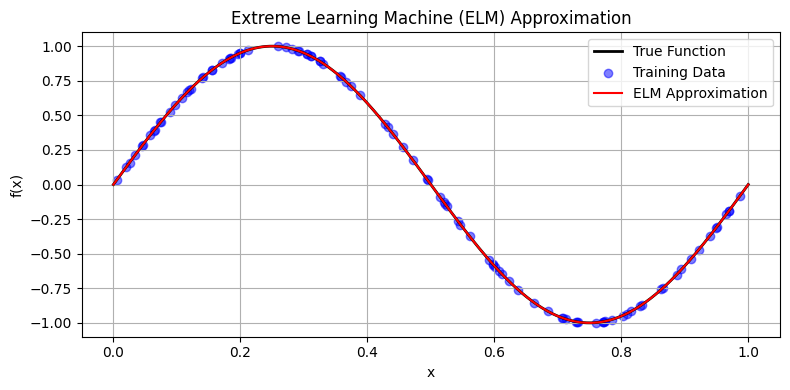

In [16]:
# 5. Plot
plt.figure(figsize=(8, 4))
plt.plot(x_test, y_true, label='True Function', color='black', linewidth=2)
plt.scatter(x_train, y_train, label='Training Data', color='blue', alpha=0.5)
plt.plot(x_test, y_pred, label='ELM Approximation', color='red')
plt.title("Extreme Learning Machine (ELM) Approximation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()